In [68]:
# stated 8-10-2025
# https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset

In [137]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Normalization

In [138]:
customers = pd.read_csv("Customer Churn.csv")

In [139]:
customers.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [140]:
customers.isnull().values.any()

np.False_

In [141]:
customers.corr()
# complains and status have good correlation with churn

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
Call Failure,1.000000,0.152879,0.169737,0.589028,0.501607,0.573349,-0.022282,0.504058,0.050406,0.192285,-0.114645,0.041758,0.121225,-0.008987
Complains,0.152879,1.000000,-0.020286,-0.033948,-0.104952,-0.090774,-0.111633,-0.058199,0.019976,0.001140,0.271405,0.003298,-0.132895,0.532053
Subscription Length,0.169737,-0.020286,1.000000,0.078789,0.124618,0.106534,0.076318,0.092009,0.021453,-0.159680,0.142841,-0.002430,0.109565,-0.032588
Charge Amount,0.589028,-0.033948,0.078789,1.000000,0.446738,0.379096,0.091533,0.415198,0.279679,0.324232,-0.356269,0.278955,0.169428,-0.202305
Seconds of Use,0.501607,-0.104952,0.124618,0.446738,1.000000,0.946489,0.102123,0.676536,0.020060,0.133593,-0.460618,0.020843,0.415087,-0.298935
Frequency of use,0.573349,-0.090774,0.106534,0.379096,0.946489,1.000000,0.100019,0.736114,-0.032544,0.206452,-0.454752,-0.028350,0.401572,-0.303337
Frequency of SMS,-0.022282,-0.111633,0.076318,0.091533,0.102123,0.100019,1.000000,0.079650,-0.053719,0.195686,-0.296164,-0.092798,0.924877,-0.220754
Distinct Called Numbers,0.504058,-0.058199,0.092009,0.415198,0.676536,0.736114,0.079650,1.000000,0.020941,0.172079,-0.413039,0.051037,0.284807,-0.278867
Age Group,0.050406,0.019976,0.021453,0.279679,0.020060,-0.032544,-0.053719,0.020941,1.000000,-0.150593,0.002506,0.960758,-0.183481,-0.014550
Tariff Plan,0.192285,0.001140,-0.159680,0.324232,0.133593,0.206452,0.195686,0.172079,-0.150593,1.000000,-0.164143,-0.119426,0.252298,-0.105853


In [142]:
customers.describe(include = "all")

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [143]:
customers["avg_call_duration"] = customers["Seconds of Use"] / customers["Frequency of use"]
# add how long the average call is

In [144]:
customers["avg_call_duration"] = customers["avg_call_duration"].fillna(0)
# sometimes the frequency of use is 0, so it becomes a nan. need to replace it with 0

In [145]:
customers.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn,avg_call_duration
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0,61.549296
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0,63.600000
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0,40.883333
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0,63.606061
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0,41.258621


In [146]:
customers = customers.drop("Frequency of use", axis=1)
# remove num calls because we already have total seconds and duration/call
# frequency and seconds also had a correlation of 0.94, so this can avoid multicollinearity

In [147]:
customers["Churn"].value_counts()
# most customers have not left the company in the 12-month span, will need to downsample

Churn
0    2655
1     495
Name: count, dtype: int64

In [148]:
df_majority = customers[customers["Churn"] == 0]
df_minority = customers[customers["Churn"] == 1]

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority)*2, random_state=5)
# use resample from sklearn to reduce number of negative class examples

In [149]:
new_customers = pd.concat([df_majority_downsampled, df_minority])

In [150]:
new_customers["Churn"].value_counts()
# fully downsampled so neg class = pos class

Churn
0    990
1    495
Name: count, dtype: int64

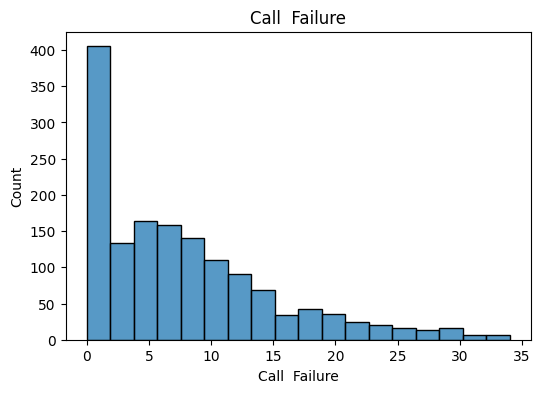

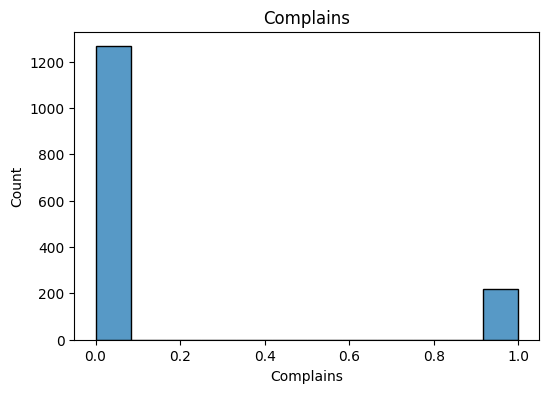

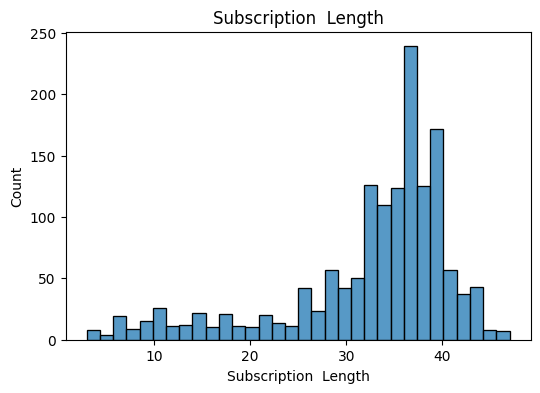

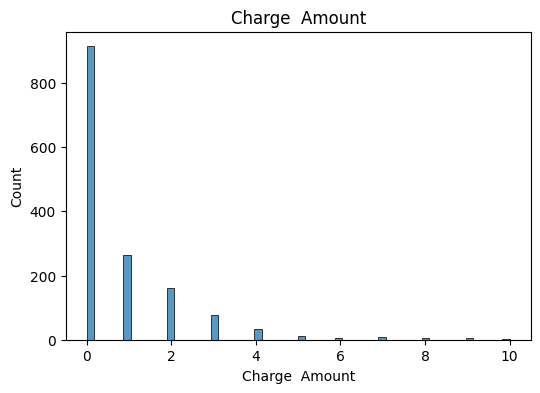

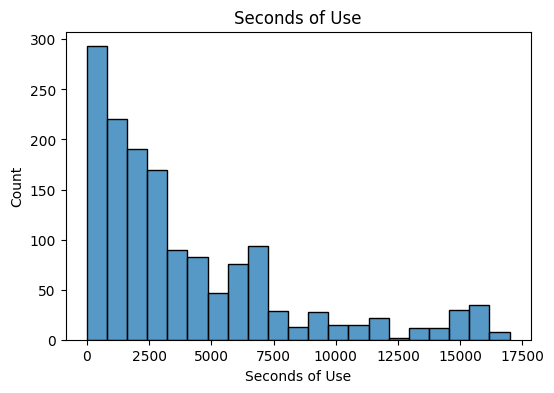

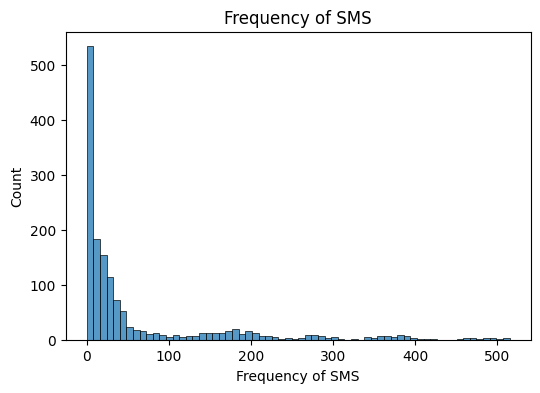

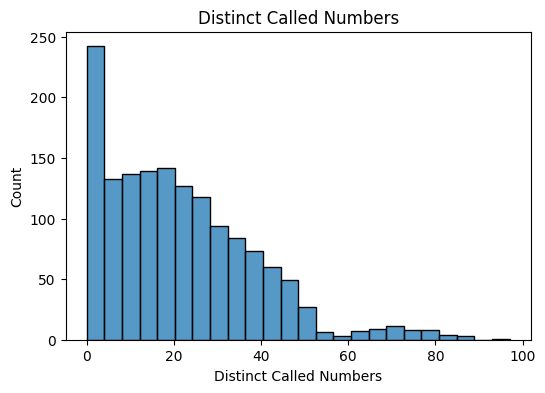

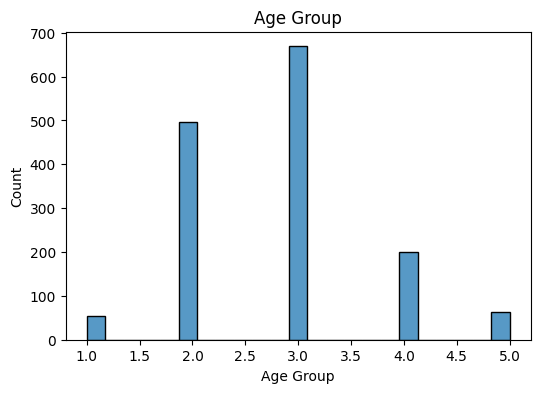

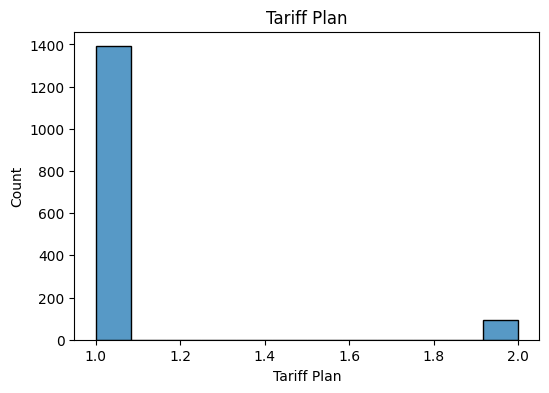

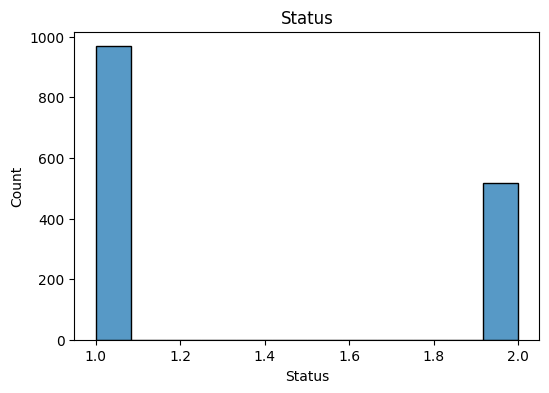

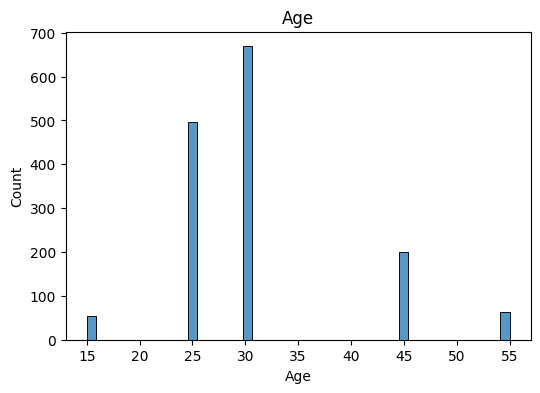

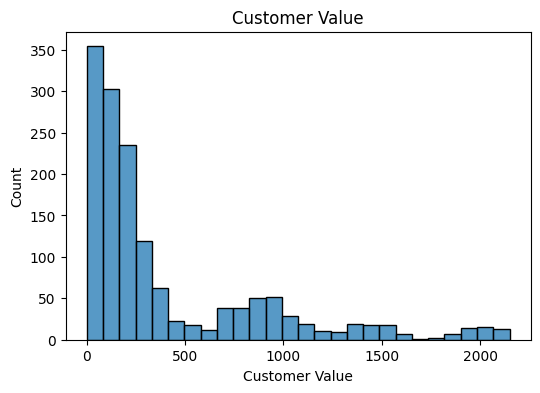

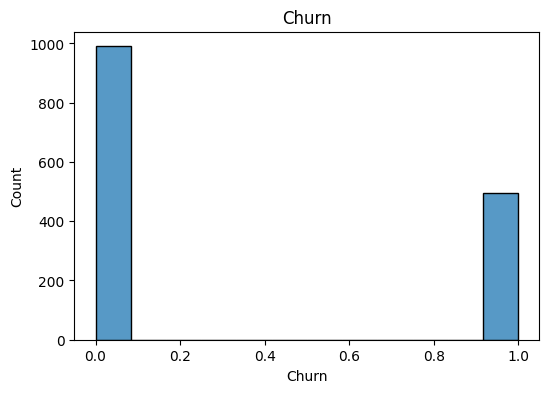

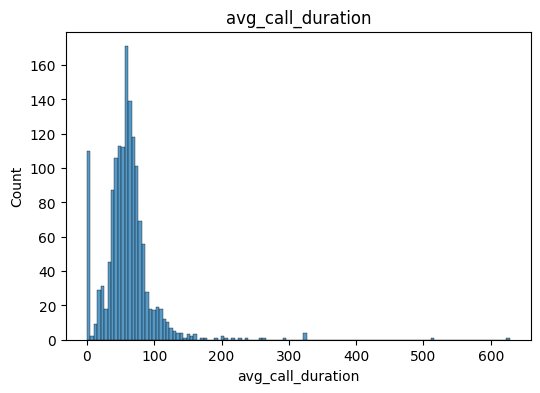

In [151]:
for col in new_customers.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=new_customers, x=col, kde=False)
    plt.title(col)
# call failure is power law
# sub length is normal
# charge amount is power law
# seconds of use is power law
# frequency of sms is power law
# distinct called numbers is power law
# age group is normal
# age is normal
# customer value is power law
# avg call duration is normal, will need to be clipped between 0-250

In [152]:
# will need to drop age (not age group) because it was never mentioned in the dataset desc
# not sure what exactly the customer value feature means or how it's calculated
new_customers = new_customers.drop("Age", axis=1)

In [153]:
new_customers["avg_call_duration"] = new_customers["avg_call_duration"].clip(lower=0, upper=250)

In [154]:
new_customers = new_customers.sample(frac=1, random_state=5).reset_index(drop=True)

In [155]:
X = new_customers.drop("Churn", axis=1)
y = new_customers["Churn"]

In [156]:
X.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,avg_call_duration
0,8,0,39,1,3325,18,21,3,1,1,206.440,92.361111
1,0,1,7,0,1183,0,5,2,1,2,53.820,91.000000
2,16,0,21,1,6348,93,46,2,2,1,710.685,43.779310
3,13,1,34,0,2493,31,29,3,1,2,225.640,51.937500
4,14,0,20,1,8932,81,41,5,1,1,258.135,50.463277


In [157]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Churn, dtype: int64

In [158]:
X[["Tariff Plan","Status"]] = X[["Tariff Plan","Status"]] - 1
# tariff and status are binary, but for some reason it's 1 and 2 instead of 0 and 1

In [159]:
X.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,avg_call_duration
0,8,0,39,1,3325,18,21,3,0,0,206.440,92.361111
1,0,1,7,0,1183,0,5,2,0,1,53.820,91.000000
2,16,0,21,1,6348,93,46,2,1,0,710.685,43.779310
3,13,1,34,0,2493,31,29,3,0,1,225.640,51.937500
4,14,0,20,1,8932,81,41,5,0,0,258.135,50.463277


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [161]:
standard_cols = ["Subscription  Length", "Age Group", "avg_call_duration"] 
power_cols = ["Call  Failure", "Charge  Amount", "Seconds of Use", "Frequency of SMS", "Distinct Called Numbers", "Customer Value"]
# setup features that need z-score scaling and power law scaling

# as it turns out, whoever made this dataset put an extra space between "Subscription" and "Length". same goes for Charge Amount and Call Failure

In [162]:
std_scaler = StandardScaler()
pwr_scaler = PowerTransformer()

In [163]:
X_train.columns.tolist()
# whoever made this dataset put an extra space between "Subscription" and "Length". same goes for Charge Amount and Call Failure

['Call  Failure',
 'Complains',
 'Subscription  Length',
 'Charge  Amount',
 'Seconds of Use',
 'Frequency of SMS',
 'Distinct Called Numbers',
 'Age Group',
 'Tariff Plan',
 'Status',
 'Customer Value',
 'avg_call_duration']

In [164]:
X_train[standard_cols] = std_scaler.fit_transform(X_train[standard_cols])
X_train[power_cols] = pwr_scaler.fit_transform(X_train[power_cols])


X_test[standard_cols] = std_scaler.transform(X_test[standard_cols])
X_test[power_cols] = pwr_scaler.transform(X_test[power_cols])

# fit_transform on train data and only transform on test data to prevent data leakage

In [165]:
X_train.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,avg_call_duration
106,0.284939,0,0.161092,-0.78376,0.413079,-1.452174,-0.308583,-0.943650,0,0,-0.086183,0.069299
75,1.400638,0,0.048385,1.37045,-0.287404,0.512389,0.196832,-0.943650,0,0,0.128915,-0.680533
795,0.723884,1,1.175461,-0.78376,-0.128085,0.023030,0.021840,0.232694,0,1,-0.235856,-0.680282
11,0.284939,0,0.837338,-0.78376,-0.640632,0.136545,-0.540082,0.232694,0,1,-0.389811,-0.274963
767,0.723884,1,0.273800,-0.78376,0.148867,0.082719,0.081794,0.232694,0,1,-0.070184,0.477341


In [166]:
X_train.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,avg_call_duration
count,1.188000e+03,1188.000000,1.188000e+03,1.188000e+03,1.188000e+03,1.188000e+03,1.188000e+03,1.188000e+03,1188.000000,1188.00000,1.188000e+03,1.188000e+03
mean,3.304502e-16,0.150673,-2.254089e-16,-7.775299e-17,-1.584965e-16,5.083850e-17,2.631640e-16,-1.876539e-16,0.063131,0.34596,-2.190541e-16,-5.681949e-17
std,1.000421e+00,0.357881,1.000421e+00,1.000421e+00,1.000421e+00,1.000421e+00,1.000421e+00,1.000421e+00,0.243301,0.47588,1.000421e+00,1.000421e+00
min,-1.424650e+00,0.000000,-3.332846e+00,-7.837601e-01,-2.118984e+00,-1.452174e+00,-1.892504e+00,-2.119994e+00,0.000000,0.00000,-2.114642e+00,-1.804326e+00
25%,-9.424021e-01,0.000000,-1.770307e-01,-7.837601e-01,-6.044891e-01,-7.411114e-01,-7.149576e-01,-9.436499e-01,0.000000,0.00000,-5.623451e-01,-4.966346e-01
50%,1.490683e-01,0.000000,2.738000e-01,-7.837601e-01,-1.355268e-02,5.368674e-02,8.179447e-02,2.326944e-01,0.000000,0.00000,-9.973201e-02,-1.366959e-02
75%,7.238845e-01,0.000000,6.119230e-01,9.509981e-01,7.299570e-01,5.994736e-01,7.434858e-01,2.326944e-01,0.000000,1.00000,7.337789e-01,3.955458e-01
max,2.098776e+00,1.000000,1.626292e+00,1.785584e+00,2.051244e+00,1.918289e+00,2.794016e+00,2.585383e+00,1.000000,1.00000,2.079861e+00,5.729480e+00


In [167]:
y_train.head()

106    0
75     0
795    0
11     0
767    1
Name: Churn, dtype: int64

In [168]:
y_train.values

array([0, 0, 0, ..., 1, 0, 0])

In [169]:
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

In [170]:
y_test

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [171]:
model = Sequential([
    Dense(64,activation="relu"),
    Dense(32, activation="relu"),
    Dense(8, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [172]:
model.compile(optimizer="adam", loss="mse") # usually use binary_crossentropy for this

In [174]:
history = model.fit(
    X_train,
    y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0808 - val_loss: 0.0796
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0729 - val_loss: 0.0759
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0686 - val_loss: 0.0726
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0595 - val_loss: 0.0698
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0706 - val_loss: 0.0697
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0594 - val_loss: 0.0666
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0627 - val_loss: 0.0640
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0628 - val_loss: 0.0624
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0551 - val_loss: 0.0621
Epoch 10/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0529 - val_loss: 0.0606
Epoch 11/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0564 - val_loss: 0.0586
Epoch 12/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0

In [175]:
loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0455 
Test loss: 0.057179439812898636


In [176]:
y_proba = model.predict(X_test) # get model predictions for positive class

custom_threshold = 0.5
y_pred = (y_proba >= custom_threshold).astype(int)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [177]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["True Negative", "True Positive"], columns=["Predicted Negative", "Predicted Positive"])
cm_df

,Predicted Negative,Predicted Positive
True Negative,185,12
True Positive,10,90


In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       197
           1       0.88      0.90      0.89       100

    accuracy                           0.93       297
   macro avg       0.92      0.92      0.92       297
weighted avg       0.93      0.93      0.93       297



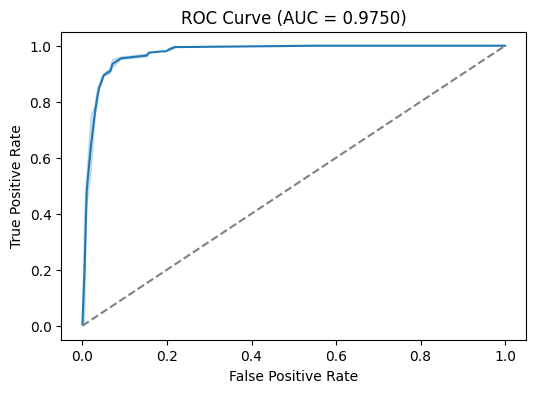

In [179]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

roc_df = pd.DataFrame({"False Positive Rate": fpr, "True Positive Rate": tpr})

plt.figure(figsize=(6,4))
sns.lineplot(data=roc_df, x="False Positive Rate", y="True Positive Rate")
sns.lineplot(x=[0,1], y=[0,1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc:.4f})")
plt.show()
# make ROC graph
# high auc - model is making confident predictions

In [ ]:
# things to change:
# downsampled size of majority class (something other than 50-50)
# loss function (mse, binary_crossentropy, mae)
# classification threshold for confusion matrix
# complexity of model architecture